In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import os
from scipy.integrate import solve_ivp
import pandas as pd

## Data import

In [11]:
dataEC1 = pd.read_csv('output.txt', delimiter='\t')
labelEC1= 'New version'
dataGOLD = pd.read_csv('output_gold.txt', delimiter='\t')
labelGOLD= 'Previous Model'

data = [dataEC1, dataGOLD]
labels = [labelEC1, labelGOLD]
N = len(data[0])
print(N)

101


In [12]:
for i in range(len(labels)):
    data[i]['Release (at/m3)']=data[i]['Xe released (at/m3)']+data[i]['Kr released (at/m3)']

In [13]:
indexes = dataGOLD[dataGOLD['Intergranular fractional coverage (/)'] == 0.5].index
indexrelease = indexes[0]
print('Release in GOLD at index',indexrelease)

Release in GOLD at index 44


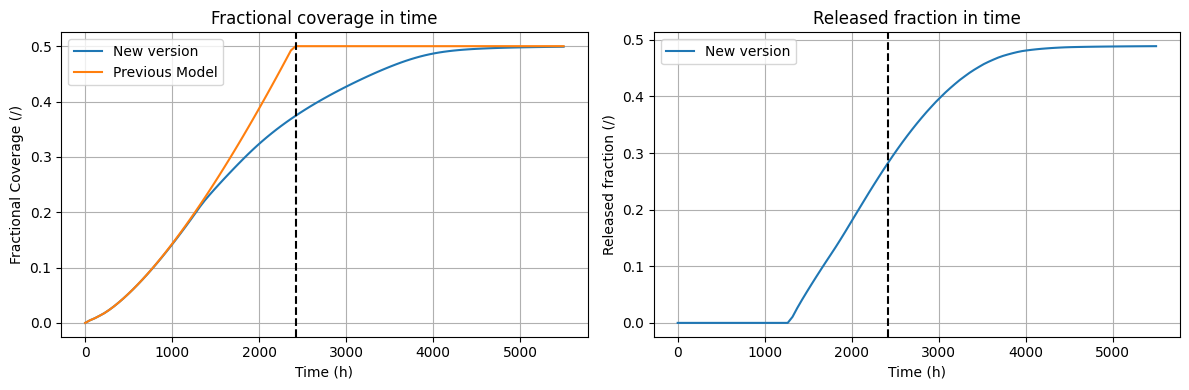

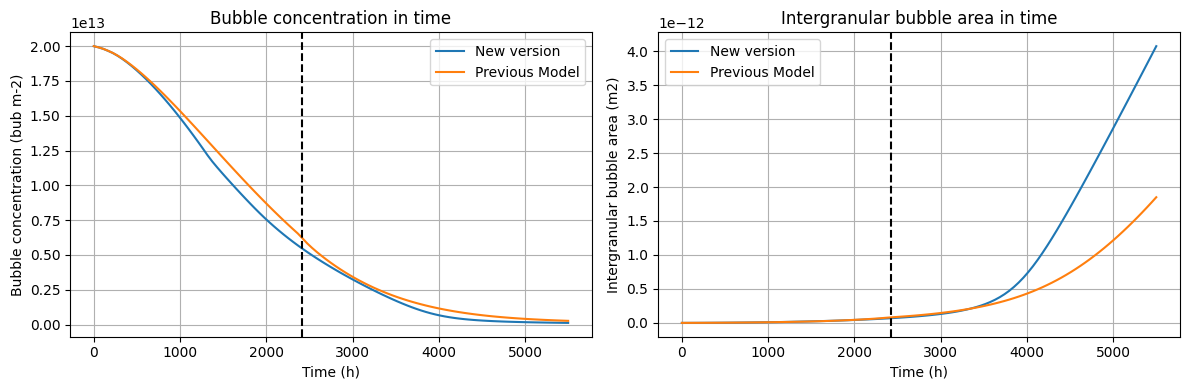

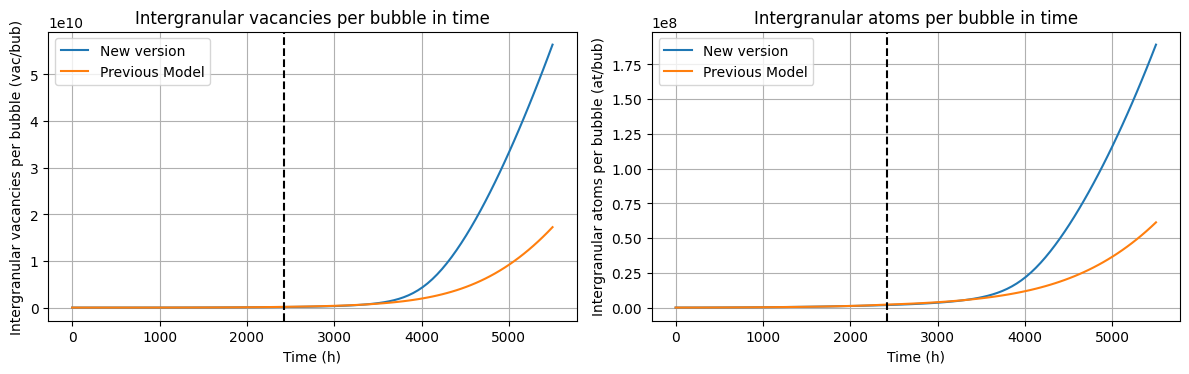

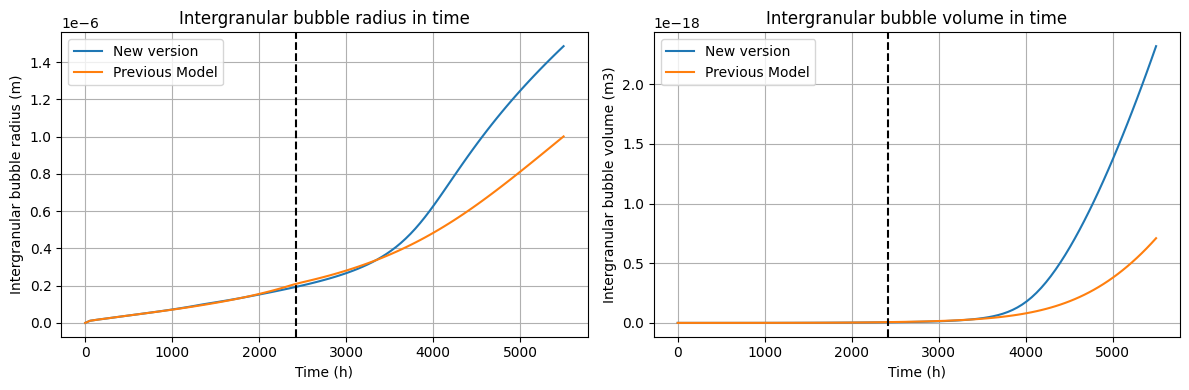

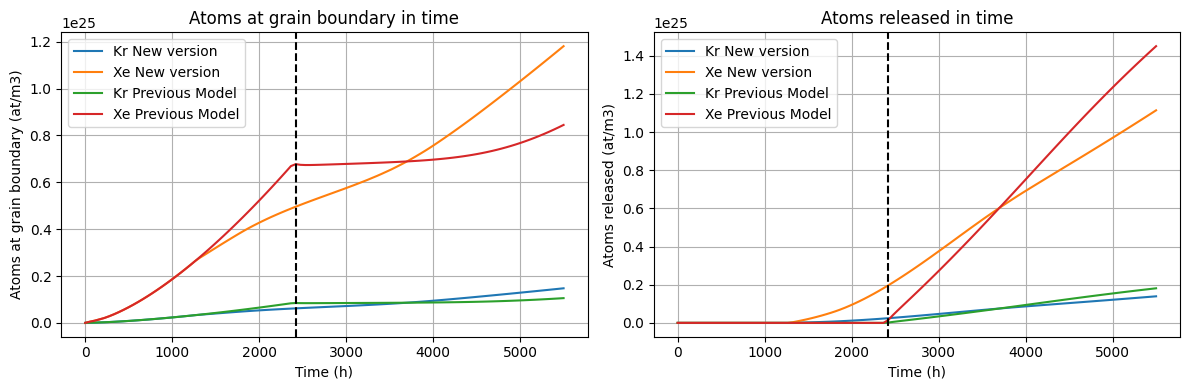

In [14]:
# Plot the solution

fig, ax = plt.subplots(1,2,figsize=(12, 4))

for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular fractional coverage (/)', kind='line', label=labels[i], ax=ax[0])
ax[0].set_xlabel('Time (h)')
ax[0].set_ylabel('Fractional Coverage (/)')
ax[0].set_title('Fractional coverage in time')
ax[0].legend()
ax[0].grid(True)
ax[0].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

for i in range(len(labels)):
    if 'Intergranular vented fraction (/)' in data[i]:
        data[i].plot(x='Time (h)', y='Intergranular vented fraction (/)', kind='line', label=labels[i], ax=ax[1])
ax[1].set_xlabel('Time (h)')
ax[1].set_ylabel('Released fraction (/)')
ax[1].set_title('Released fraction in time')
ax[1].legend()
ax[1].grid(True)
ax[1].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

plt.tight_layout()
plt.show()



fig, ax = plt.subplots(1,2,figsize=(12, 4))

for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular bubble concentration (bub/m2)', kind='line', label=labels[i], ax=ax[0])
ax[0].set_xlabel('Time (h)')
ax[0].set_ylabel('Bubble concentration (bub m-2)')
ax[0].set_title('Bubble concentration in time')
ax[0].legend()
ax[0].grid(True)
ax[0].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')


for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular bubble area (m2)', kind='line', label=labels[i], ax=ax[1])
ax[1].set_xlabel('Time (h)')
ax[1].set_ylabel('Intergranular bubble area (m2)')
ax[1].set_title('Intergranular bubble area in time')
ax[1].legend()
ax[1].grid(True)
ax[1].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

plt.tight_layout()
plt.show()



fig, ax = plt.subplots(1,2,figsize=(12, 4))
for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular vacancies per bubble (vac/bub)', kind='line', label=labels[i], ax=ax[0])
ax[0].set_xlabel('Time (h)')
ax[0].set_ylabel('Intergranular vacancies per bubble (vac/bub)')
ax[0].set_title('Intergranular vacancies per bubble in time')
ax[0].legend()
ax[0].grid(True)
ax[0].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular atoms per bubble (at/bub)', kind='line', label=labels[i], ax=ax[1])
ax[1].set_xlabel('Time (h)')
ax[1].set_ylabel('Intergranular atoms per bubble (at/bub)')
ax[1].set_title('Intergranular atoms per bubble in time')
ax[1].legend()
ax[1].grid(True)
ax[1].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

plt.tight_layout()
plt.show()



fig, ax = plt.subplots(1,2,figsize=(12, 4))
for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular bubble radius (m)', kind='line', label=labels[i], ax=ax[0])
ax[0].set_xlabel('Time (h)')
ax[0].set_ylabel('Intergranular bubble radius (m)')
ax[0].set_title('Intergranular bubble radius in time')
ax[0].legend()
ax[0].grid(True)
ax[0].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular bubble volume (m3)', kind='line', label=labels[i], ax=ax[1])
ax[1].set_xlabel('Time (h)')
ax[1].set_ylabel('Intergranular bubble volume (m3)')
ax[1].set_title('Intergranular bubble volume in time')
ax[1].legend()
ax[1].grid(True)
ax[1].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

plt.tight_layout()
plt.show()



fig, ax = plt.subplots(1,2,figsize=(12, 4))
for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Kr at grain boundary (at/m3)', kind='line', label='Kr '+labels[i], ax=ax[0])
    data[i].plot(x='Time (h)', y='Xe at grain boundary (at/m3)', kind='line', label='Xe '+labels[i], ax=ax[0])
ax[0].set_xlabel('Time (h)')
ax[0].set_ylabel('Atoms at grain boundary (at/m3)')
ax[0].set_title('Atoms at grain boundary in time')
ax[0].legend()
ax[0].grid(True)
ax[0].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Kr released (at/m3)', kind='line', label='Kr '+labels[i], ax=ax[1])
    data[i].plot(x='Time (h)', y='Xe released (at/m3)', kind='line', label='Xe '+labels[i], ax=ax[1])
ax[1].set_xlabel('Time (h)')
ax[1].set_ylabel('Atoms released (at/m3)')
ax[1].set_title('Atoms released in time')
ax[1].legend()
ax[1].grid(True)
ax[1].axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

plt.tight_layout()
plt.show()

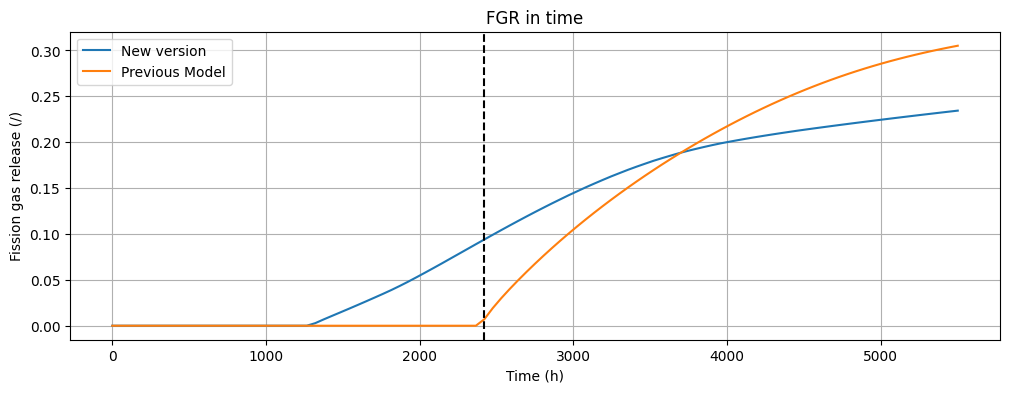

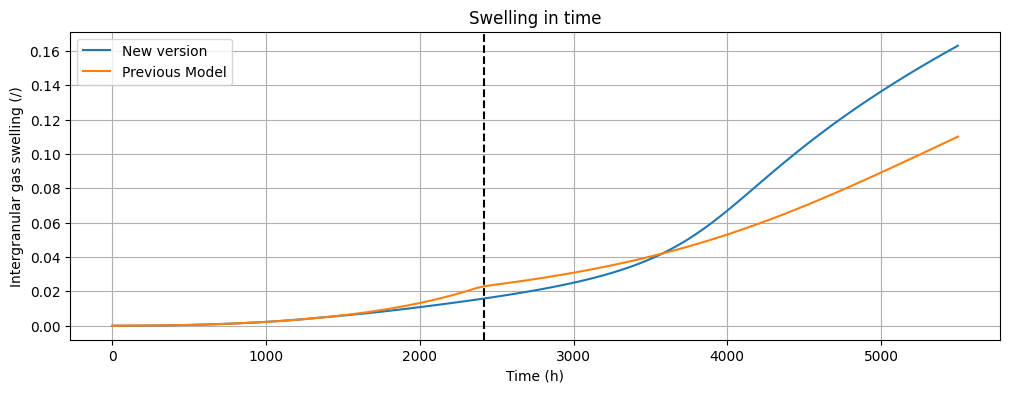

In [15]:
fig, ax = plt.subplots(1,1,figsize=(12, 4))
for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Fission gas release (/)', kind='line', label=labels[i], ax=ax)
ax.set_xlabel('Time (h)')
ax.set_ylabel('Fission gas release (/)')
ax.set_title('FGR in time')
ax.legend()
ax.grid(True)
ax.axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

fig, ax = plt.subplots(1,1,figsize=(12, 4))
for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular gas swelling (/)', kind='line', label=labels[i], ax=ax)
ax.set_xlabel('Time (h)')
ax.set_ylabel('Intergranular gas swelling (/)')
ax.set_title('Swelling in time')
ax.legend()
ax.grid(True)
ax.axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')


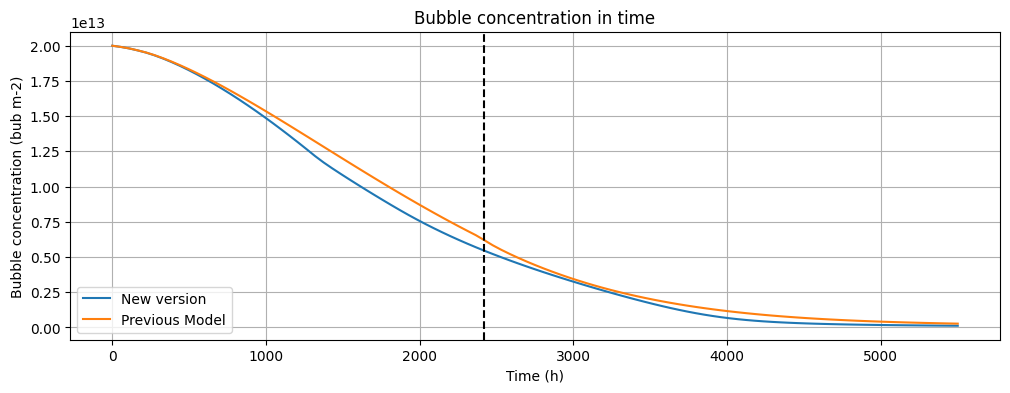

In [16]:
fig, ax = plt.subplots(1,1,figsize=(12, 4))

for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular bubble concentration (bub/m2)', kind='line', label=labels[i], ax=ax)
ax.set_xlabel('Time (h)')
ax.set_ylabel('Bubble concentration (bub m-2)')
ax.set_title('Bubble concentration in time')
ax.legend(loc='lower left')
ax.grid(True)
ax.axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

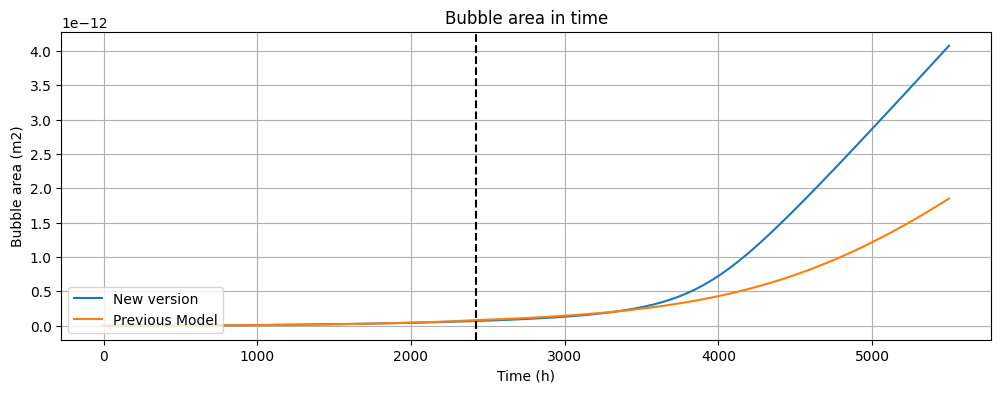

In [17]:
fig, ax = plt.subplots(1,1,figsize=(12, 4))

for i in range(len(labels)):
    data[i].plot(x='Time (h)', y='Intergranular bubble area (m2)', kind='line', label=labels[i], ax=ax)
ax.set_xlabel('Time (h)')
ax.set_ylabel('Bubble area (m2)')
ax.set_title('Bubble area in time')
ax.legend(loc='lower left')
ax.grid(True)
ax.axvline(x=dataGOLD['Time (h)'].iloc[indexrelease], color='black', linewidth=1.5, linestyle='--')

zoom = 'no'
if zoom == 'yes':
    axins = zoomed_inset_axes(ax, zoom=2, loc='upper right')  # Specify the zoom factor and location
    for i in range(len(labels)):
        data[i].plot(x='Time (h)', y='Intergranular bubble area (m2)', kind='line', label=labels[i], ax=axins)
    axins.set_xlim([2000,3000])  
    axins.set_ylim([0,1e-10])  
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.1")
    axins.set_xticks([])     
    axins.set_yticks([])   
    axins.legend_.remove()

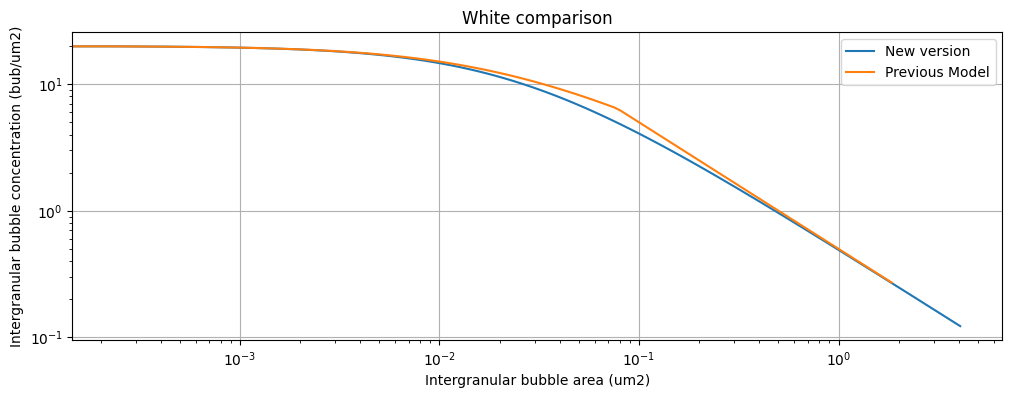

In [18]:
# White comparison
xaxistoplot = 'Intergranular bubble area (m2)'
whattoplot= 'Intergranular bubble concentration (bub/m2)'
fig, ax = plt.subplots(1,1,figsize=(12, 4))
for i in range(len(labels)):
    if whattoplot in data[i]:
        data[i][xaxistoplot] *= 1e12
        data[i][whattoplot] *= 1e-12
        data[i].plot(x=xaxistoplot, y=whattoplot, kind='line', label=labels[i], ax=ax)
        data[i][xaxistoplot] *= 1e-12
        data[i][whattoplot] *= 1e+12
ax.set_xlabel('Intergranular bubble area (um2)')
ax.set_ylabel('Intergranular bubble concentration (bub/um2)')
ax.set_title('White comparison')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
